In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

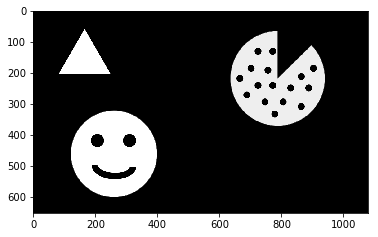

In [3]:
img=cv2.imread("../DATA/internal_external.png",0)
plt.imshow(img,cmap="gray")

In [4]:
image,contours,hierarchy=cv2.findContours(image=img,mode=cv2.RETR_CCOMP,method=cv2.CHAIN_APPROX_SIMPLE)

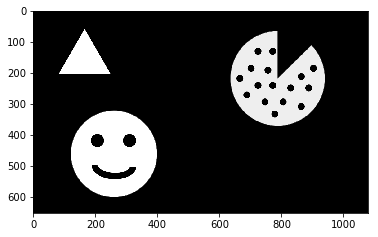

In [5]:
plt.imshow(image,cmap="gray")

In [6]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [7]:
external_contours=np.zeros(image.shape)

In [8]:
#values with -1 are treated as external contours

In [9]:
list(range(len(contours)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [10]:
for i in range(len(contours)):
    #EXTERNAL
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours,contours,i,255,-1)

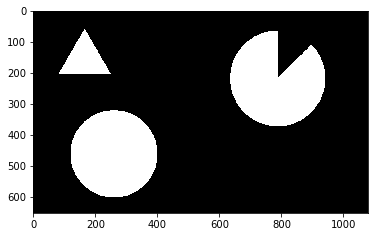

In [11]:
plt.imshow(external_contours,cmap="gray")

In [12]:
internal_contours=np.zeros(image.shape)

In [36]:
#All the values which are not -1 are treated as internal contours 

In [32]:
for i in range(len(contours)):
    #INTERNAL
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours,contours,i,255,-1)
        

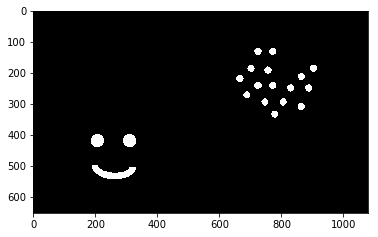

In [24]:
plt.imshow(internal_contours,cmap='gray')

In [43]:
internal_contours=np.zeros(image.shape)

In [37]:
for i in range(len(contours)):
    if (hierarchy[0][i][3]) == 4:
        cv2.drawContours(internal_contours,contours,i,255,-1)

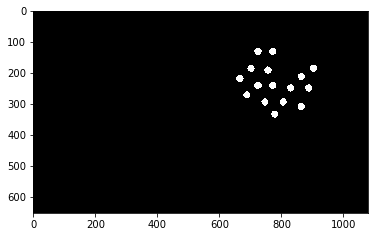

In [38]:
plt.imshow(internal_contours,cmap="gray")

In [44]:
for i in range(len(contours)):
    if (hierarchy[0][i][3]) == 0:
        cv2.drawContours(internal_contours,contours,i,255,-1)

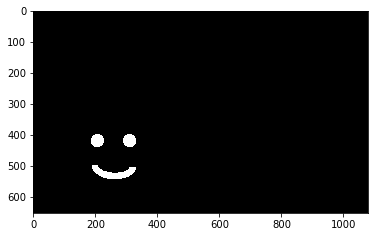

In [45]:
plt.imshow(internal_contours,cmap='gray')

In [268]:
#EXTERNAL

In [269]:
image,contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [271]:
hierarchy # in External Retrieval mode values with hierarchy[0][i][3] as -1 gets returned

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

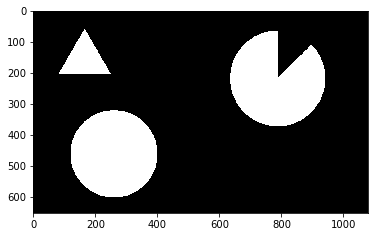

In [272]:
external_contours=np.zeros(image.shape)
for i in range(len(contours)):
        cv2.drawContours(external_contours,contours,i,255,-1)
plt.imshow(external_contours,cmap='gray')

In [47]:
#

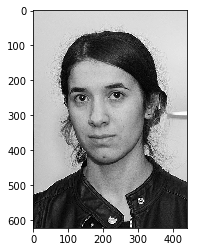

In [51]:
nadia=cv2.imread("../DATA/nadia_murad.jpg",0)
plt.imshow(nadia,cmap='gray')

In [245]:
#FUNCTION TO FIND EXTERNAL AND INTERNAL CONTOURS
def ext_int_con(image,contours,hierarchy):
    ext_con=np.zeros(image.shape)
    int_con=np.zeros(image.shape)
    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:
            #EXTERNAL
            cv2.drawContours(ext_con,contours,i,255,-1)
        else:
            #Internal
            cv2.drawContours(int_con,contours,i,255,-1)

    plt.subplot(121)
    plt.title("External")
    plt.imshow(ext_con,cmap='gray')
    plt.subplot(122)
    plt.title("Internal")
    plt.imshow(int_con,cmap='gray')

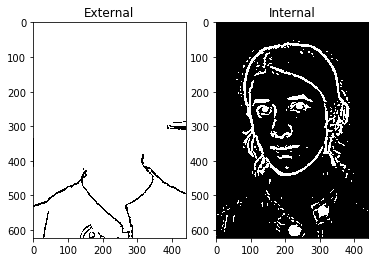

In [246]:
ext_int_con(image,contours,hierarchy)

In [267]:
# CANNY + CONTOUR

In [152]:
nadia_blur=cv2.blur(nadia,(5,5))

In [153]:
median=np.median(nadia_blur)
lower=int(max(0,0.7*median))
upper=int(min(1.3*median,255))


In [154]:
out=cv2.Canny(nadia_blur,lower,upper)

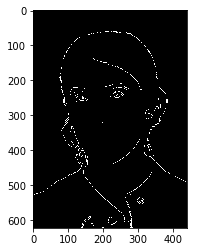

In [155]:
plt.imshow(out,cmap="gray")

In [156]:
image,contours,hierarchy=cv2.findContours(out,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

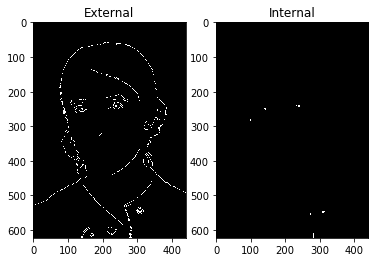

In [157]:
ext_int_con(image,contours,hierarchy)

In [248]:
##ADAPTIVE THRESHOLD + CONTOURS

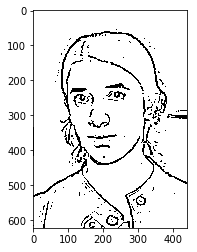

In [263]:
nadia_blur=cv2.blur(nadia,(5,5))
ad_thresh=cv2.adaptiveThreshold(nadia_blur,161,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,8)
plt.imshow(ad_thresh,cmap='gray')

In [264]:
image,contours,hierarchy=cv2.findContours(ad_thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

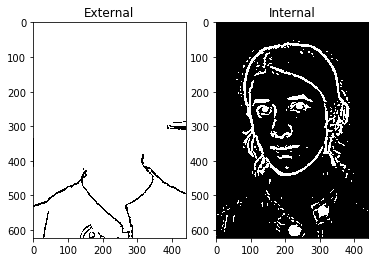

In [265]:
ext_int_con(image,contours,hierarchy)

In [266]:
##THRESHOLD + CONTOUR

In [177]:
ret,thresh=cv2.threshold(nadia_blur,100,255,cv2.THRESH_BINARY)

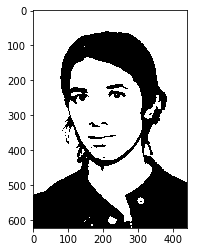

In [178]:
plt.imshow(thresh,cmap='gray')

In [180]:
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

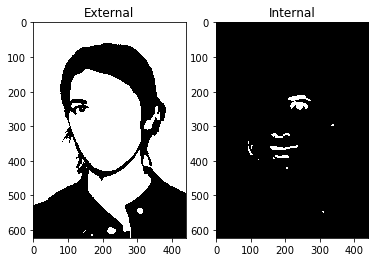

In [181]:
ext_int_con(image,contours,hierarchy)

In [182]:
##

In [218]:
ret,thresh=cv2.threshold(nadia_blur,80,255,cv2.THRESH_BINARY)

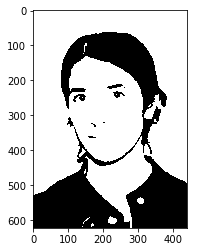

In [219]:
plt.imshow(thresh,cmap='gray')

In [220]:
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

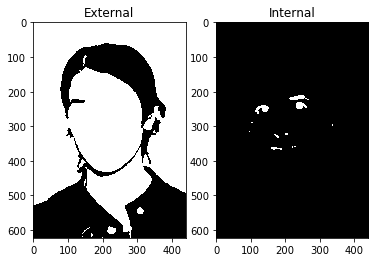

In [221]:
ext_int_con(image,contours,hierarchy)

In [222]:
#Eyebrow is not detected as internal as it is a curve which is connected with the background curve of the image ,
#so it is also detected as external contour,
# whereas eyes, nose and mouth are not connected with background and are in foreground, thus treated as internal contour.

In [223]:
# fixing the threshold for separation helps to find better results but sometimes may give wrong results

In [235]:
# As when threshold value decreased for better separation between background and foreground objects, 
# along with eye, nose,lips, hairs too  come in internal contours  

In [231]:
ret,thresh=cv2.threshold(nadia_blur,77,255,cv2.THRESH_BINARY)

In [232]:
image,contours,hierarchy=cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

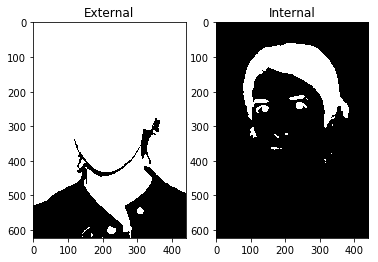

In [233]:
ext_int_con(image,contours,hierarchy)